# DESARROLLO CASO PRACTICO 2
##### Se pretende aprender el tipo de cáncer de mama (maligno=1, benigno=0) utilizando los algoritmos de clasificación revisados en la unidad 2, así como realizar la evaluación del rendimiento de los algoritmos  usando las métricas y gráficas respectivas.

###  Analisis de Datos- Universidad de los Hemisferios
#### Maestría en Inteligencia Artificial Aplicada
#### Integrantes : Victoria Fárez | Wilfrido Almache | Christian Iza | Ruben Tocain


## 1. Instalar librerías requeridas

In [2]:
#Importar librerias necesarias
%pip install pandas numpy matplotlib seaborn scikit-learn shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.1 MB/s eta 0:00:00


## 2. Importar librerías necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# K-NN for breast cancer
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# RNA for breast cancer
from keras.models import Sequential
from keras.layers import Dense, Dropout   #dropout es para evitar overfitting
from keras.optimizers import Adam         #modelo de optimizacion
from keras.callbacks import EarlyStopping

## 3. Importar Datos

In [4]:
import requests

# Enlace de descarga directa de Google Drive
url = "https://drive.google.com/uc?export=download&id=19TC25WNYmNHTy-rXrfzCynlW5ODzpvdt"

# Descargar el archivo desde Google Drive
r = requests.get(url)
with open('data.csv', 'wb') as f:
    f.write(r.content)

# Cargar el archivo CSV usando pandas
data = pd.read_csv('data.csv')

# Mostrar las primeras filas del dataset
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

## 4. Preprocesamiento de Datos

In [5]:
# Sustituir 'M' por 1 y 'B' por 0 en la columna de Diagnosis
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
# Descartar la columna de ID
data.drop(columns=['id'], inplace=True)
# Verificar valores perdidos
print(data.isnull().sum())
#print(data['diagnosis'])

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

## 5. Análisis Exploratorio de Datos (EDA)

In [6]:
# Estadísticas descriptivas
print(data.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

### 5.1. Gráfico de barras para categorizar Malignos y Benignos

Valores Exactos de Diagnósticos: Benigno vs Maligno
diagnosis
0    357
1    212
Name: count, dtype: int64


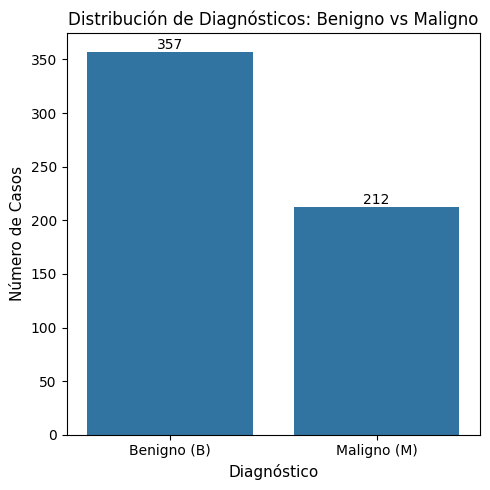

In [7]:
# Contar los casos benignos y malignos
diagnosis_counts = data['diagnosis'].value_counts()
# Imprimir los valores exactos en consola
print("Valores Exactos de Diagnósticos: Benigno vs Maligno")
print(diagnosis_counts)
# Crear el gráfico de barras
plt.figure(figsize=(5, 5))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
# Personalizar el gráfico
plt.title('Distribución de Diagnósticos: Benigno vs Maligno', fontsize=12)
plt.xlabel('Diagnóstico', fontsize=11)
plt.ylabel('Número de Casos', fontsize=11)
plt.xticks([0, 1], ['Benigno (B)', 'Maligno (M)'], fontsize=10)
# Añadir etiquetas de valor en las barras
for i, v in enumerate(diagnosis_counts.values):
    plt.text(i, v + 3, str(v), ha='center', fontsize=10)
# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


### 5.2. Correlación de todas las características

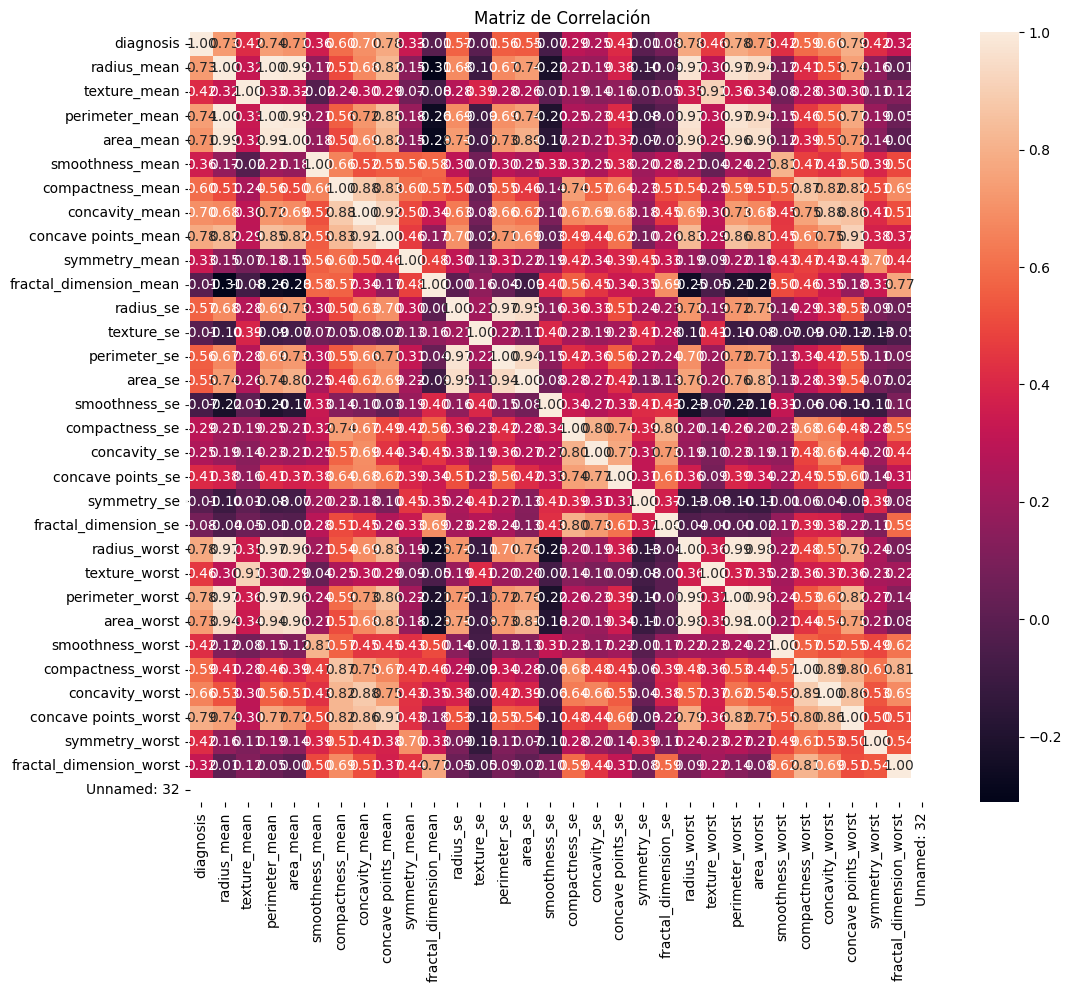

In [8]:
# Matriz de correlación de las características
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### 5.3. Selección de variables relevantes / diagrama de caja o gráfico de caja y bigotes

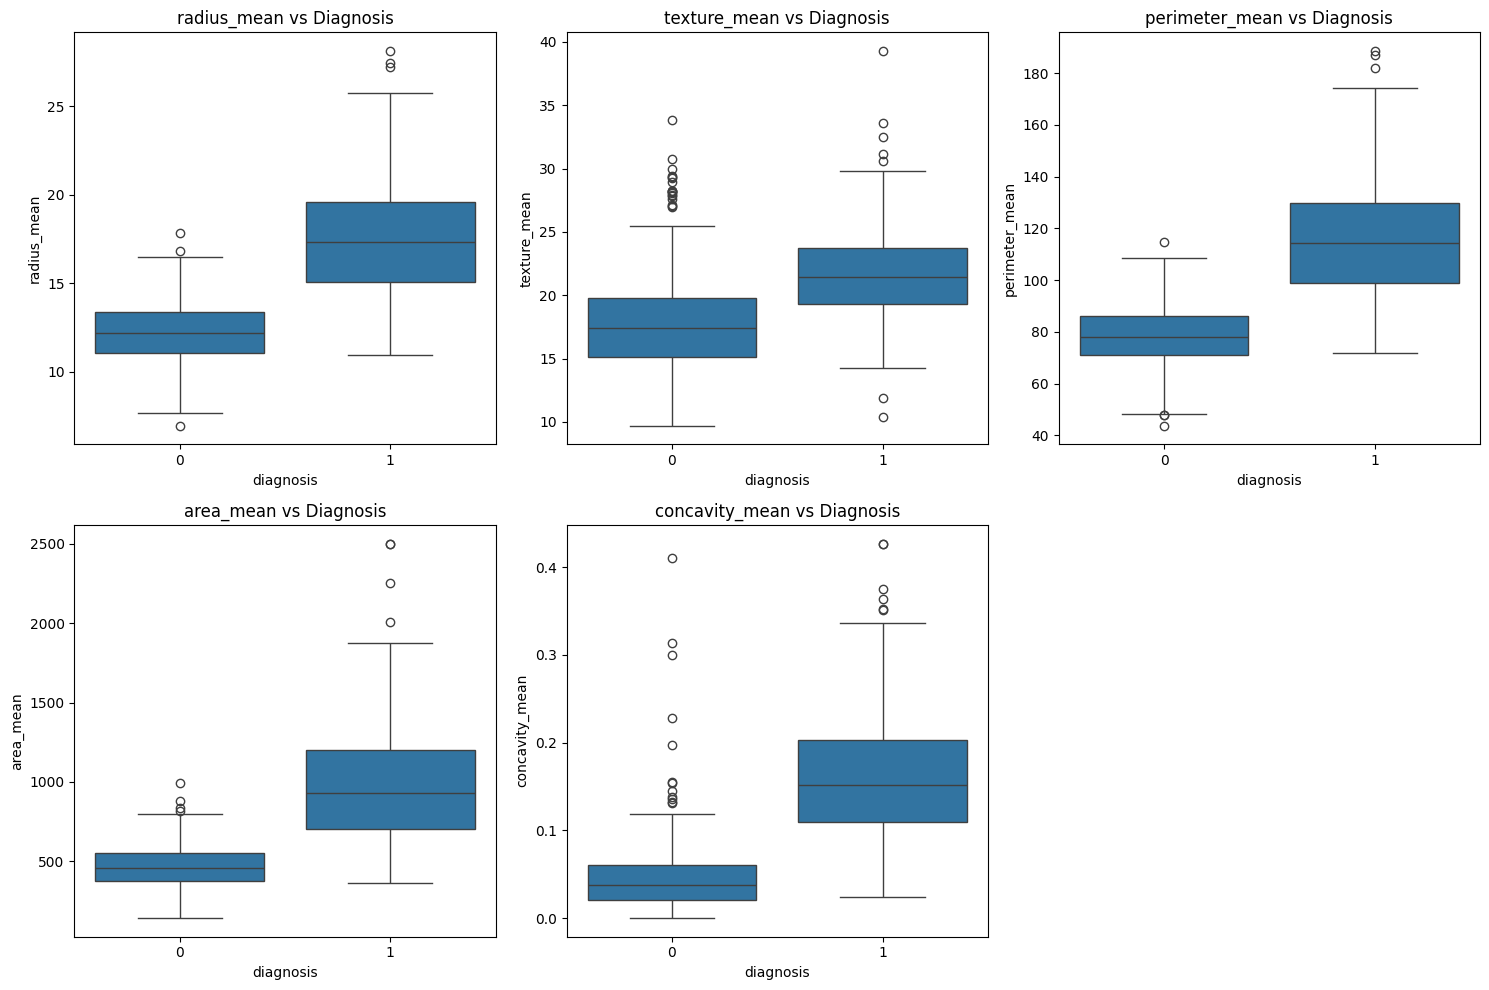

In [9]:
# Seleccionar variables relevantes para visualización
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']
# Diagrama de caja o gráfico de caja y bigotes
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
#plt.savefig('boxplots_features.png')
plt.show()
plt.close()

### 5.4. Correlación ajustada a parametros más importantes

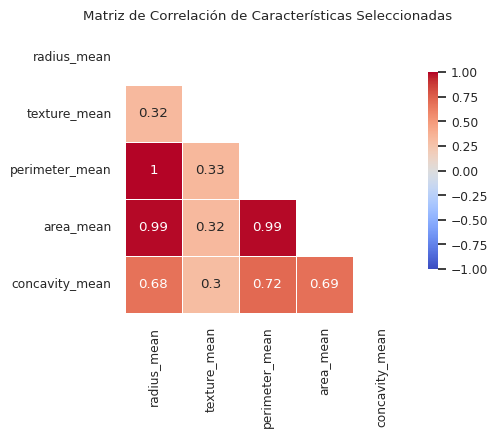

In [10]:
# Crear la matriz de correlación
corr = data[features].corr()
# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configurar el estilo de seaborn
sns.set(style="white", font_scale=0.8)
# Crear la figura
plt.figure(figsize=(5, 5))
# Crear el heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Matriz de Correlación de Características Seleccionadas")
plt.tight_layout()
plt.show()

### 5.5. Quitar valores atipicos
**Se afina con el aumento del limite superior al doble para no perder informacion y mejorar el modelo**

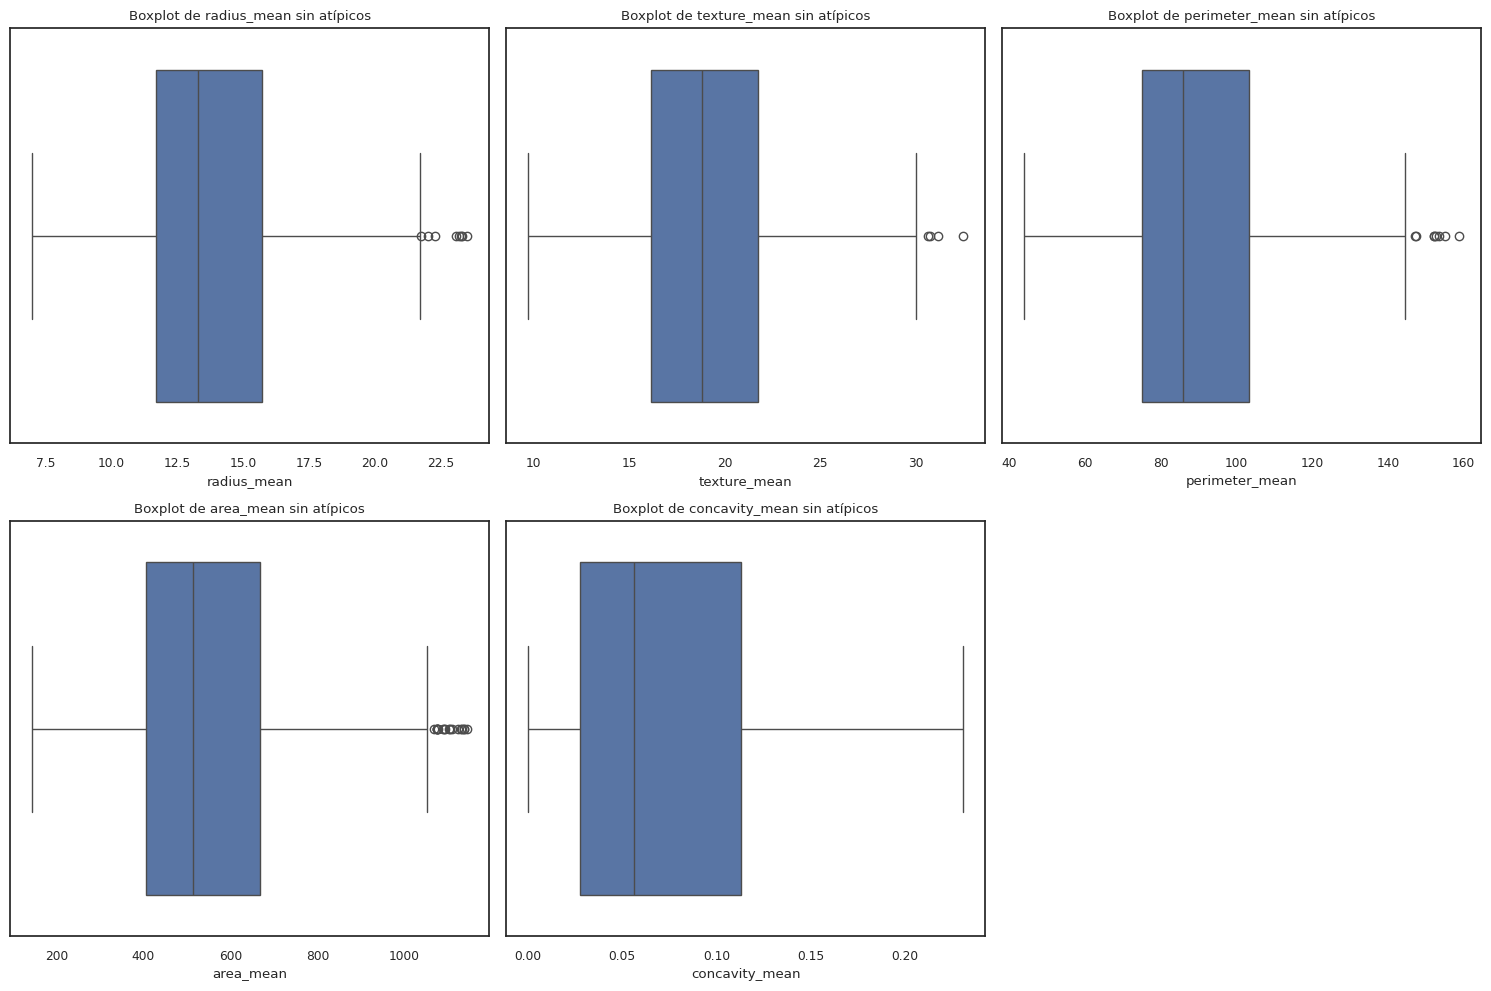

In [11]:
#Definición de factores para limites superior e inferior
limits = {feature: [1.5, 1.5] for feature in features}

#limits = {
#    'radius_mean': [1, 1.5],
#    'texture_mean': [1, 1.5],
#    'perimeter_mean': [1, 1.5],
#    'area_mean': [0.5, 1.5],
#    'concavity_mean': [0.5, 1.5]
#}

limits = {
    'radius_mean': [2, 1.5],
    'texture_mean': [2, 1.5],
    'perimeter_mean': [2, 1.5],
    'area_mean': [1, 1.5],
    'concavity_mean': [1, 1.5]
}
#Espacio para los boxplot
plt.figure(figsize=(15, 10))
# Iterar sobre cada característica y aplicar los límites
for i, (key, values) in enumerate(limits.items(), 1):
    Q1 = data[key].quantile(0.25)
    Q3 = data[key].quantile(0.75)
    IQR = Q3 - Q1  # rango intercuartil
    limite_superior = Q3 + values[0] * IQR
    limite_inferior = Q1 - values[1] * IQR
    # Filtrar los datos para quitar los valores atípicos
    filtered_df = data[(data[key] >= limite_inferior) & (data[key] <= limite_superior)]
    # Crear el boxplot
    plt.subplot(2, 3, i)
    sns.boxplot(x=filtered_df[key])
    plt.title(f'Boxplot de {key} sin atípicos')
    plt.xlabel(key)
plt.tight_layout()
plt.show()
plt.close()


## 6. Algoritmos de clasificación

### 6.1. Logistic Regression

In [14]:
#Elimina columnas con NaN
columns_with_nan = data.columns[data.isnull().any()]
data.drop(columns_with_nan, axis=1, inplace=True)
# Carga el conjunto de datos Breast Cancer
##dataset = load_breast_cancer()
##X = dataset.data # 569x30
##y = dataset.target # 569x1
# Separar la primera columna en y y las columnas restantes en X
y = data.iloc[:, 0]    # Todas las filas, primera columna
X = data.iloc[:, 1:]   # Todas las filas, de la segunda columna hasta el final
##print (y)
##print (X)

#### 6.1.1. Dividir conjunto de datos y entranemiento
**Se afina el algoritmo tomando 30% del data set para test (Se realiza varias iteracciones)**

In [15]:
# Divide el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 6.1.2. Normalizar Data

In [16]:
# Normaliza los datos para que todas las características tengan una escala similar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 6.1.3. Crear y entrenar modelo REGRESION LOGISTICA

In [17]:
# Crea y entrena el modelo de regresión logistica
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Imprime los coeficientes y el intercepto del modelo entrenado
print("\nCoeficientes del modelo:")
print(model.coef_)
print("\nIntercepto del modelo:")
print(model.intercept_)


Coeficientes del modelo:
[[ 0.36151014  0.36590894  0.31610122  0.41880063  0.18212827 -0.62679803
   0.74987144  1.11026184 -0.21782944 -0.13788028  1.24254311 -0.15541981
   0.60518674  0.87138493  0.17738092 -0.59728543  0.08110875  0.47494075
  -0.50330967 -0.69838981  0.8138174   1.2879328   0.53402497  0.78196751
   0.50440415 -0.11569862  0.97693569  0.79835894  1.19944887  0.10073636]]

Intercepto del modelo:
[-0.44233222]


#### 6.1.4. Predicciones

In [19]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

#### 6.1.5. Probabilidades a etiquetas binarias

In [20]:
# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

#### 6.1.5. Informe de evaluación modelo entrenado

In [21]:
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



6.1.6. Matriz de Confusión

confusion matrix: 
 [[106   2]
 [  1  62]]


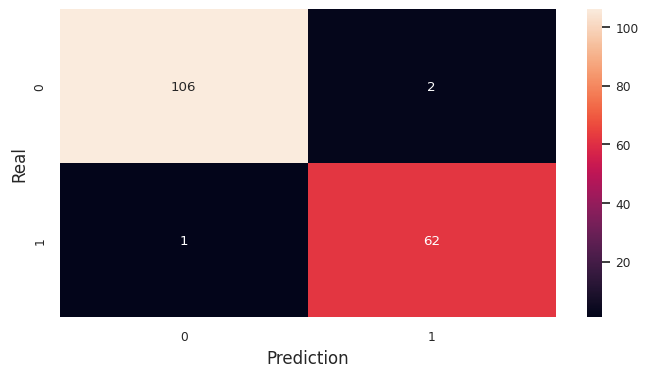

In [22]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

#### 6.1.7. Metricas varias

accuracy:  0.9824561403508771
recall:  0.9841269841269841
precision:  0.96875
specificity:  0.9814814814814815
f1 score:  0.9763779527559054
auc:  0.9828042328042329


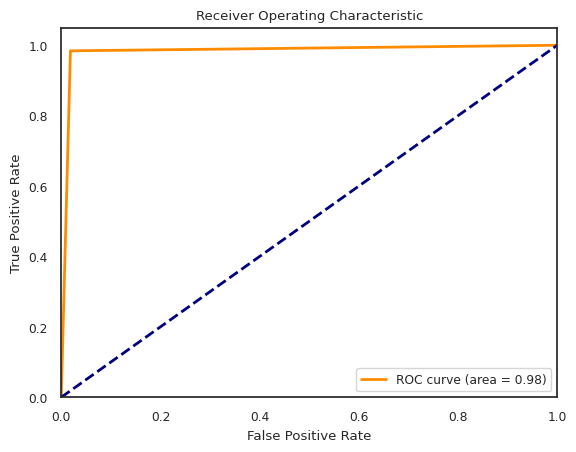

R2:  0.9246031746031746


In [23]:
# Exactitud:
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
R = r2_score(y_test, y_pred)
print("R2: ", R)

#### 6.1.8 Visualizacion de las variables la importancia de las caracteristicas

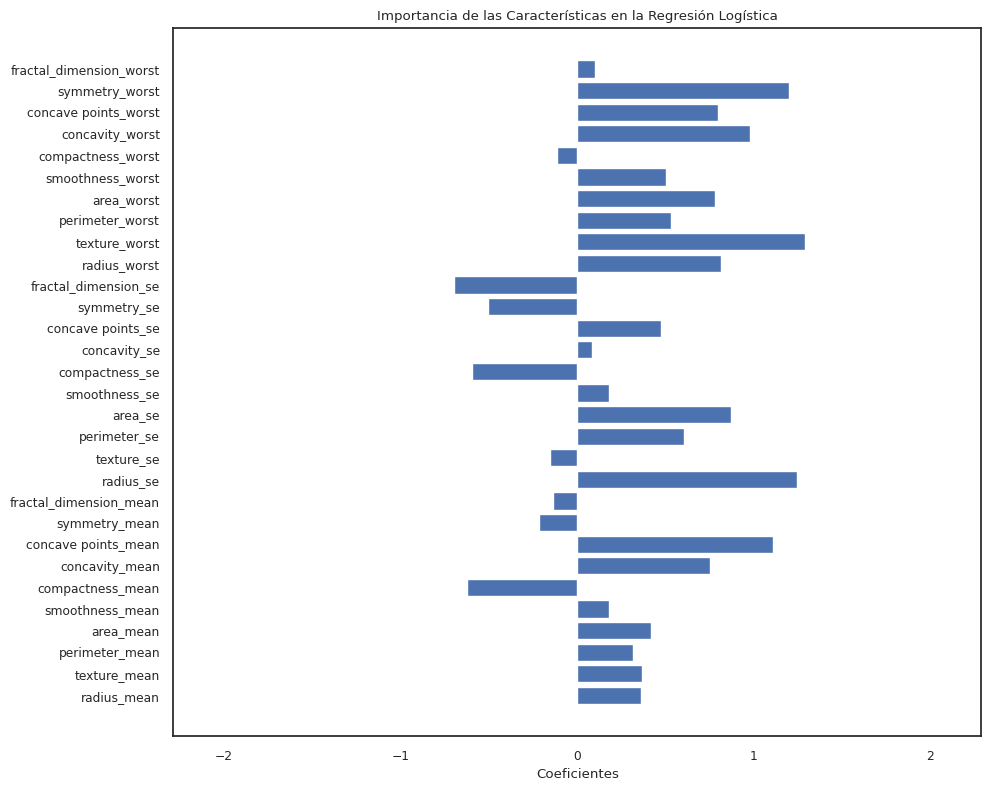

In [24]:
# Visualizar la importancia de las características
feature_names = data.columns[1:]
coefficients = model.coef_
# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

# Crear un gráfico de barras horizontal
ax.barh(feature_names, coefficients[0])
ax.set_title('Importancia de las Características en la Regresión Logística')
ax.set_xlabel('Coeficientes')
ax.set_xlim(-max(abs(coefficients[0]))-1, max(abs(coefficients[0]))+1)

plt.tight_layout()
plt.show()

#### 6.1.9. Guardar Modelo

In [25]:
# Guardar el modelo a un archivo
joblib.dump(model, 'cancerMamaModel-LR.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('cancerMamaModel-LR.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)

### 6.2. ARBOL DE DECISIONES
**Se afina el algoritmo entrenando el modelo con 30% del data set para test, con 5 capas de profundidad y criterion = gini (Se realiza varias iteracciones)**

In [26]:
# Divide el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea y entrena el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=5, criterion = 'gini', random_state=42) #criterion = 'gini'
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### 6.2.1. Predicciones

In [27]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

#### 6.2.2. Convertir probabilidades en label binaries

In [28]:
# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

#### 6.2.3. Informe de Evaluación

In [29]:
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



#### 6.2.4. Matriz de Confusión

confusion matrix: 
 [[104   4]
 [  4  59]]


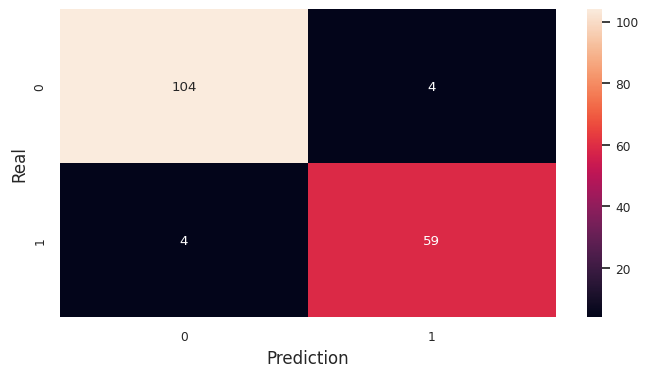

In [30]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

#### 6.2.5. Metricas

accuracy:  0.9532163742690059
recall:  0.9365079365079365
precision:  0.9365079365079365
specificity:  0.9814814814814815
f1 score:  0.9365079365079365
auc:  0.9497354497354498


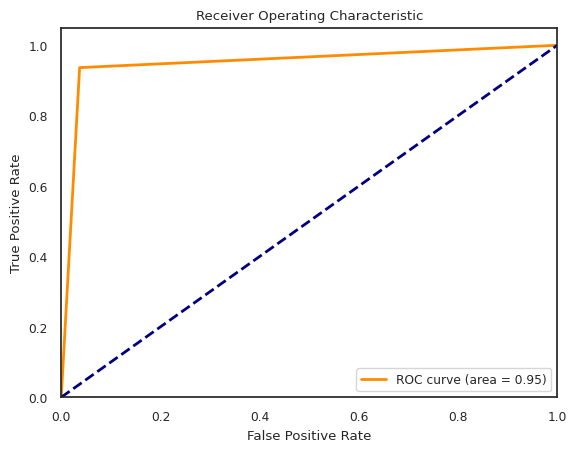

R2:  0.798941798941799


In [31]:
# Exactitud:
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
print("specificity: ", specificity)

# Puntuación F1:
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
R = r2_score(y_test, y_pred)
print("R2: ", R)

#### 6.2.3. Gráfico del árbol de decisiones

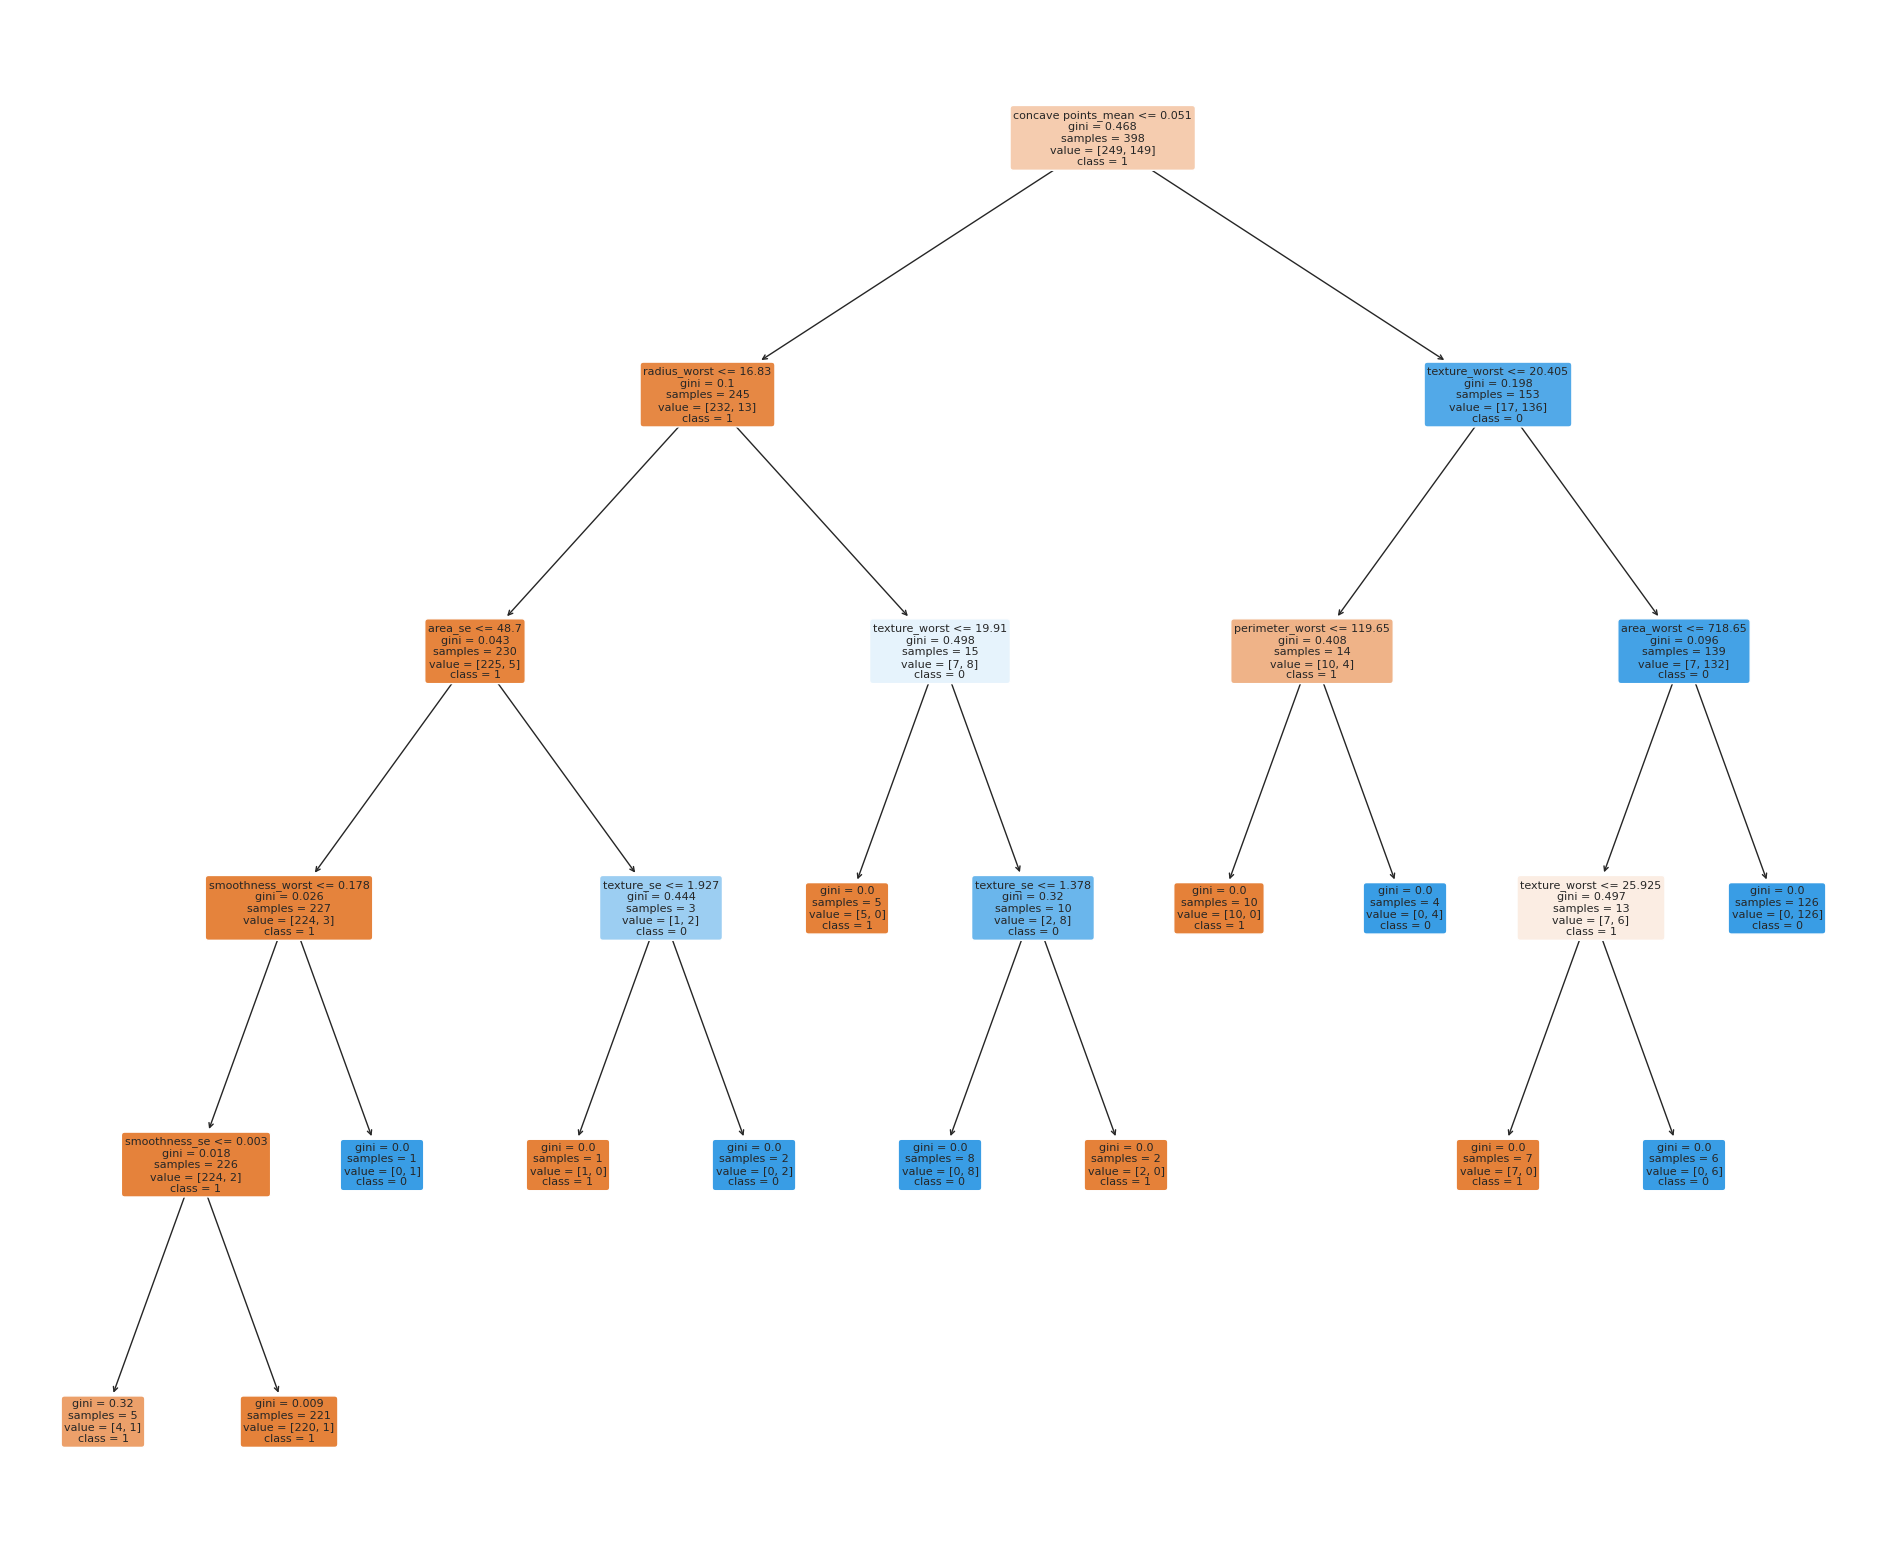

In [32]:
# Visualizar un árbol de decisión usando matplotlib
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(24, 20))
# Dibujar el árbol de decisión
# Obtener los nombres de las características
feature_names = X.columns.tolist()
# Obtener los nombres de las clases (asumiendo que y contiene valores numéricos y necesitas los nombres)
class_names = y.unique().astype(str).tolist()

plot_tree(model,
                feature_names = feature_names,
                class_names = class_names,
                filled=True,
                rounded=True,
                ax=ax)
# Mostrar la gráfica
plt.show()

#### 6.2.4 Importancia de las características

                   Variable  Importancia
7       concave points_mean     0.719701
21            texture_worst     0.119998
20             radius_worst     0.040313
23               area_worst     0.037373
22          perimeter_worst     0.031252
11               texture_se     0.024793
13                  area_se     0.013829
24         smoothness_worst     0.010698
14            smoothness_se     0.002044
19     fractal_dimension_se     0.000000
0               radius_mean     0.000000
17        concave points_se     0.000000
25        compactness_worst     0.000000
26          concavity_worst     0.000000
27     concave points_worst     0.000000
28           symmetry_worst     0.000000
18              symmetry_se     0.000000
15           compactness_se     0.000000
16             concavity_se     0.000000
1              texture_mean     0.000000
12             perimeter_se     0.000000
10                radius_se     0.000000
9    fractal_dimension_mean     0.000000
8             sy

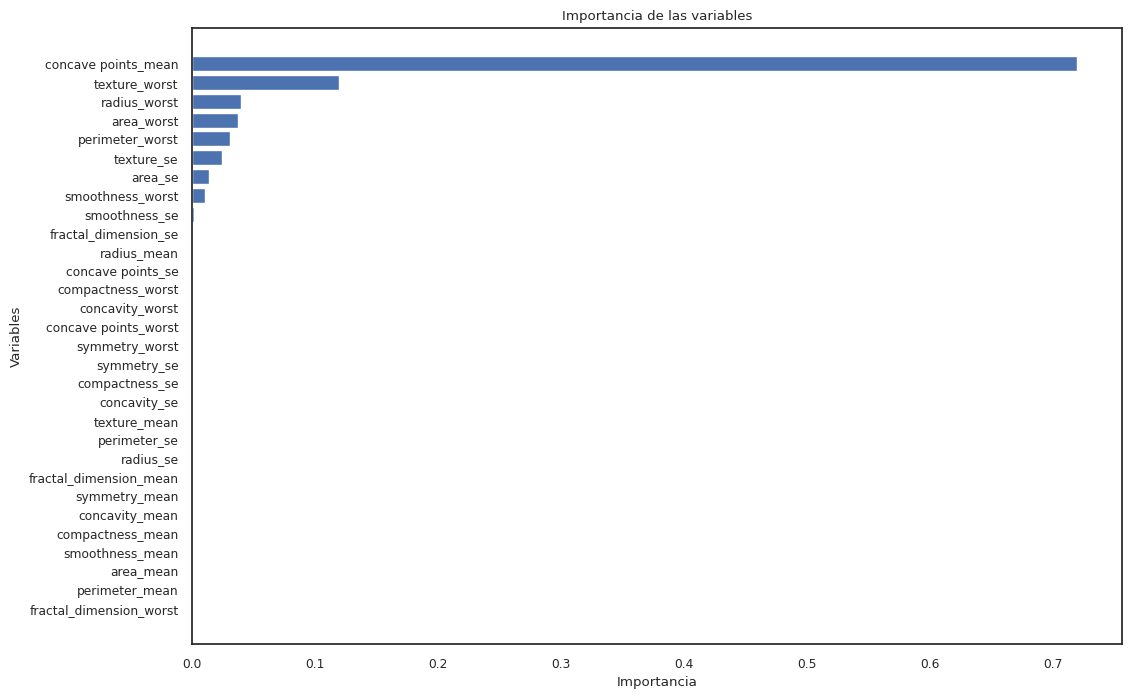

In [33]:
# Calcular y visualizar la importancia de las variables en la predicción del modelo
importances = model.feature_importances_
# Crear un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)
print(feature_importances)

# Visualizar las importancias de las variables
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Variable'], feature_importances['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables')
plt.gca().invert_yaxis()
plt.show()

#### 6.2.5. Guardar Modelo

In [34]:
# Guardar el modelo a un archivo
joblib.dump(model, 'cancerMamaModel-DT.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('cancerMamaModel-DT.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)

### 6.3 ALGORITMO K-NN
**Se afina el algoritmo tomando 20% del data set para test (Se realiza varias iteracciones)**

In [35]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 6.3.1 Normalizamos el algoritmo

In [36]:
# Normaliza los datos para que todas las características tengan una escala similar
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 6.3.2 Creamos y entrenamos el modelo
**Se afina el algoritmo tomando 9 vecinos con funcion Manhattan (Se realiza varias iteracciones)**

In [37]:
# Crea y entrena el modelo K-NN
model = KNeighborsClassifier(n_neighbors=9, p=1,  # Función Manhattan
                             weights='uniform')

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

#### 6.3.3 Creamos las predicciones

In [38]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

#### 6.3.4 Evaluamos el modelo entrenado

In [39]:
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



#### 6.3.5 Matriz de confusion

confusion matrix: 
 [[69  2]
 [ 2 41]]


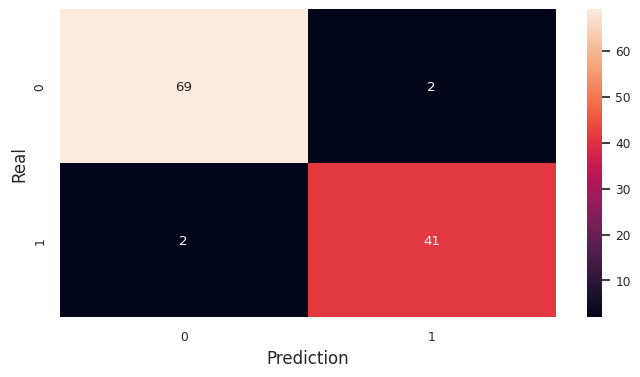

In [40]:
# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

#### 6.3.6 Metricas

accuracy:  0.9649122807017544
recall:  0.9534883720930233
precision:  0.9534883720930233
specificity:  0.971830985915493
f1 score:  0.9534883720930233
auc:  0.9626596790042581


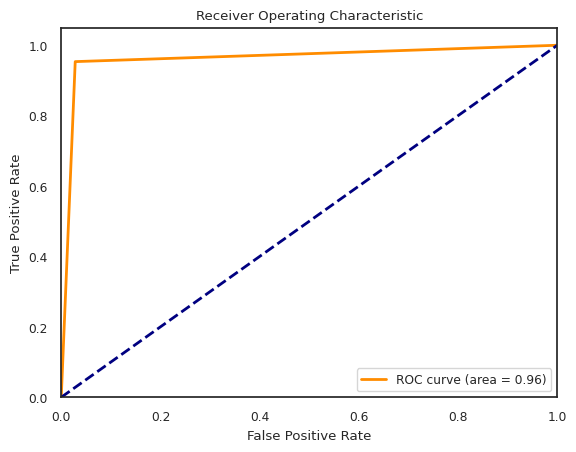

R2:  0.8506387160170324


In [41]:
# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)


#### 6.3.7 Importancia de las caracteristicas

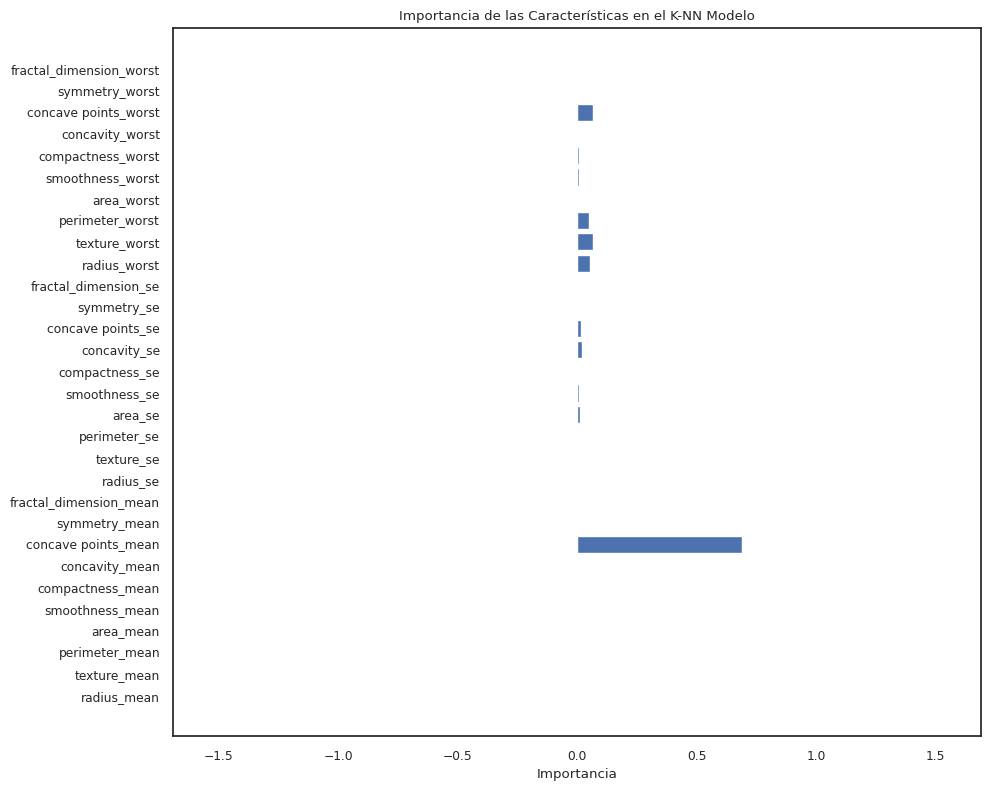

In [42]:
# Create and train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Calculate feature importances
importances = model.feature_importances_

# Rest of the code remains the same
feature_names = data.columns[1:]
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(feature_names, importances)
ax.set_title('Importancia de las Características en el K-NN Modelo')
ax.set_xlabel('Importancia')
ax.set_xlim(-max(abs(importances))-1, max(abs(importances))+1)
plt.tight_layout()
plt.show()

#### 6.3.8 Guardamos el modelo

In [43]:
# Guardar el modelo a un archivo
import joblib
joblib.dump(model, 'CancerMama_knn_model.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('CancerMama_knn_model.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)

###6.4 ALGORITMO RNA

In [44]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 6.4.1 Normalización de los datos

In [45]:
# Normaliza los datos para que todas las características tengan una escala similar
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 6.4.2 Creación y Entrenamiento del modelo

In [46]:
# Crea y entrena el modelo RNA
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=30))   # se aplica la capa densa de 10 aplicando la regla de la piramide
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Entrenamiento con Adam
opt = Adam(learning_rate = 1e-2)                      # por defecto lr=1e-3 que tan rapido o lento son las actualiaciones de los pesos.
model.compile(loss='binary_crossentropy',             # hiperparametro funcion de perdida se utiliza entropia cruzada binaria
              optimizer=opt,
              metrics=['accuracy'])

# Configurar early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, # patience...
                               restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,    #batch size debe ser multiplos de 2
          validation_data=(X_test, y_test), callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 3s 91ms/step - loss: 0.6156 - accuracy: 0.7407 - val_loss: 0.4894 - val_accuracy: 0.9035
Epoch 2/100
15/15 [==============================] - 0s 26ms/step - loss: 0.4554 - accuracy: 0.8769 - val_loss: 0.3443 - val_accuracy: 0.9386
Epoch 

#### 6.4.3 Creación de las Predicciones

In [47]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

# Convierte las salidas en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


#### 6.4.4 Evaluación del modelo

In [48]:
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### 6.4.5 Matriz de Confusión

confusion matrix: 
 [[70  1]
 [ 1 42]]


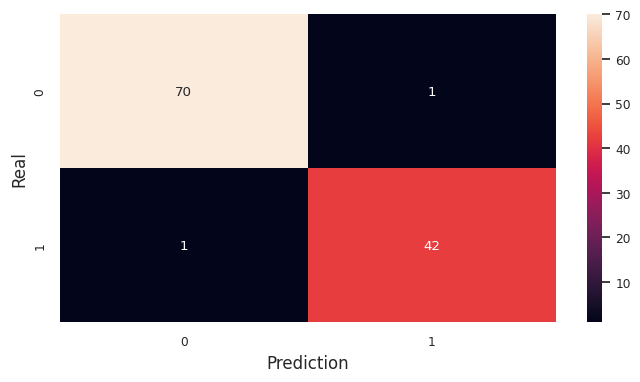

In [49]:
# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

#### 6.4.6 Metricas

accuracy:  0.9824561403508771
recall:  0.9767441860465116
precision:  0.9767441860465116
specificity:  0.9859154929577465
f1 score:  0.9767441860465116
auc:  0.981329839502129


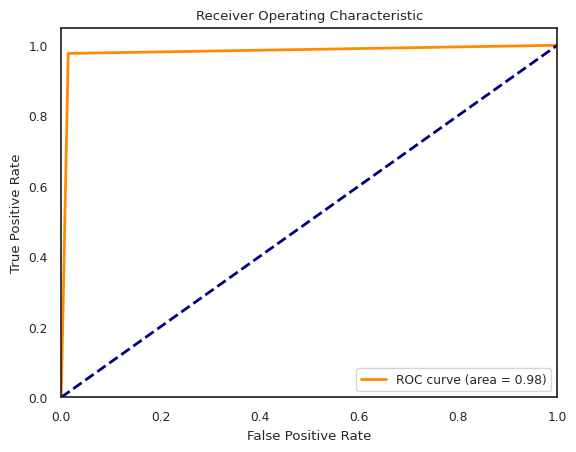

R2:  0.9253193580085162


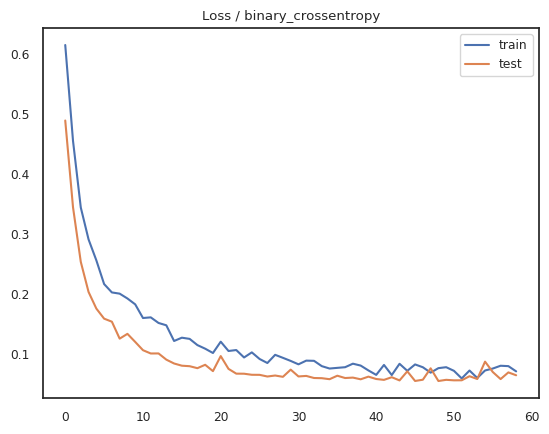

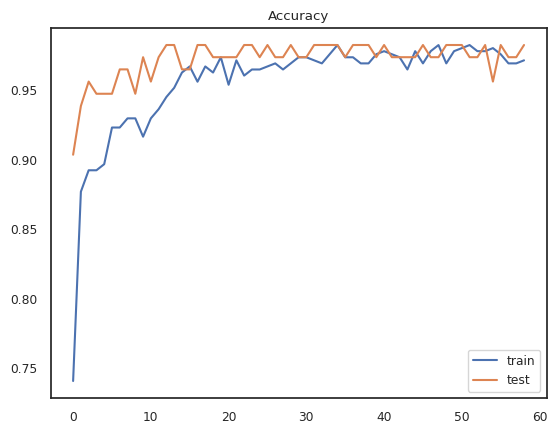

In [53]:
# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC ...debe abarcar todo el recuadro
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

# Curvas de Aprendizaje
# plot loss during training
plt.title('Loss / binary_crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


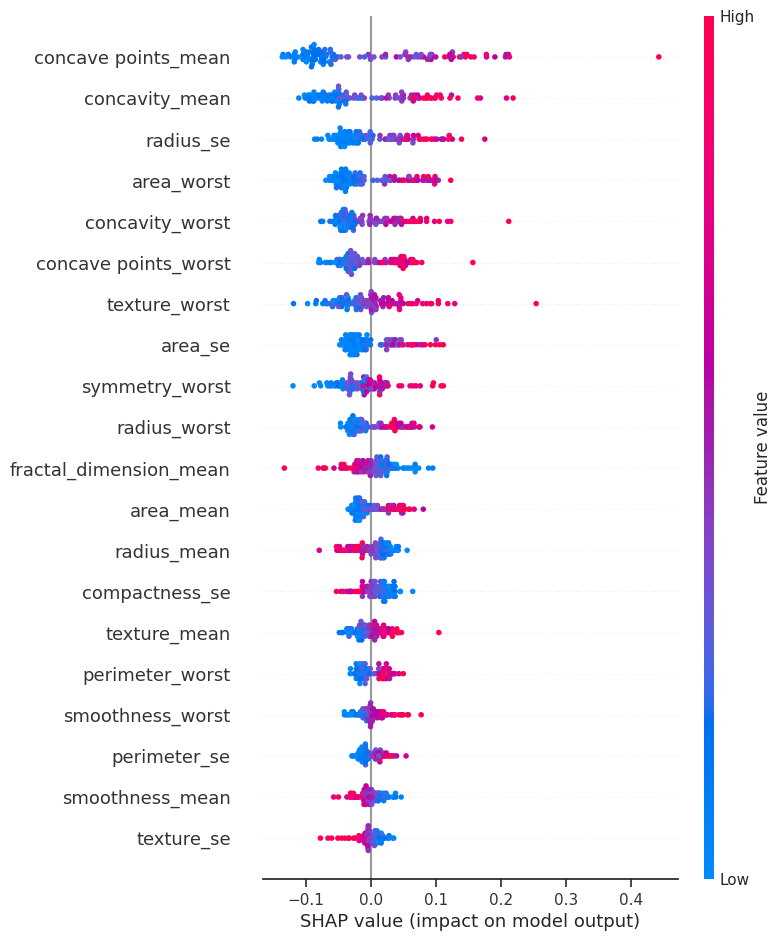

In [56]:
# SHAP (SHapley Additive exPlanations) para explicar las predicciones de un modelo de machine learning.
import shap # pip install shap
# Crear un explainer de SHAP usando en conjunto de entrenamiento
explainer = shap.Explainer(model, X_train)
# Obtener las explicaciones SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test)
# Proporciona una visión general de la importancia de las características y su impacto en las predicciones.
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

#### 6.4.7 Guardar el Modelo

In [57]:
# Guardar el modelo completo (arquitectura, pesos y configuración) en un archivo HDF5
model.save('RNA_model.h5')  # asi se graba con keras
print("Modelo guardado.")


# Cargar el modelo desde el archivo HDF5
from tensorflow.keras.models import load_model
loaded_model = load_model('RNA_model.h5')
print("Modelo cargado.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo guardado.
Modelo cargado.
